In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploaded= files.upload()

Saving titanic_train.csv to titanic_train.csv


In [0]:
train = pd.read_csv('titanic_train.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 2880x720 with 0 Axes>

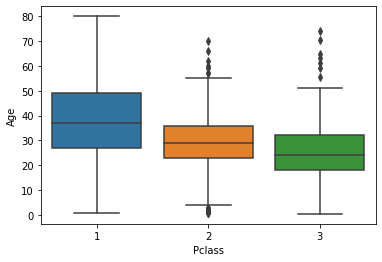

<Figure size 2880x720 with 0 Axes>

In [0]:
sns.boxplot(x='Pclass', y='Age', data=train)
plt.figure(figsize=(40, 10))

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [0]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

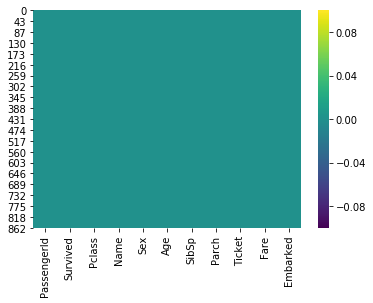

In [0]:
sns.heatmap(train.isnull(), cmap="viridis")

In [0]:
train.drop('Cabin', axis=1, inplace=True)

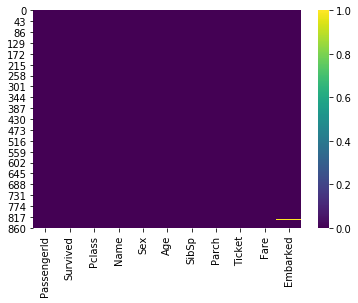

In [0]:
sns.heatmap(train.isnull(), cmap="viridis")

In [0]:
train.dropna(inplace=True)

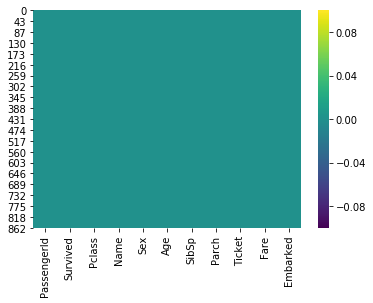

In [0]:
sns.heatmap(train.isnull(), cmap="viridis")

In [0]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,37.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,24.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,24.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,29.0,1,0,237736,30.0708,C


In [0]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [0]:
train =pd.concat([train, sex, embark], axis=1)

In [0]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,37.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,24.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,24.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,29.0,1,0,237736,30.0708,C,0,0,0


In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: ignored

In [0]:
train.tail(

)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,29.0,0,0,13.00,1,0,1
887,888,1,1,37.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,37.0,0,0,30.00,1,0,0
890,891,0,3,24.0,0,0,7.75,1,1,0


In [0]:
train.drop('PassengerId',axis=1,inplace=True)

In [0]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [0]:
X= train.drop('Survived', axis=1)
y= train['Survived']

In [0]:

!pip install https://github.com/scikit-learn/scikit-learn/archive/master.zip


     - 20.0MB 3.8MB/s
  Created wheel for scikit-learn: filename=scikit_learn-0.23.dev0-cp36-cp36m-linux_x86_64.whl size=17128441 sha256=0b021d6d07c87859a26f9f45573db34eb0dc6c720bafa66be1547871f40d2b91
  Stored in directory: /tmp/pip-ephem-wheel-cache-rsfvd_fk/wheels/9e/4b/7e/56798a5efcb7101fb6518d859ba612b4c38ff8be4898bdfb6f
Successfully built scikit-learn
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_test_split?

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [0]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
perdiction = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,perdiction))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       174
           1       0.85      0.65      0.74       120

    accuracy                           0.81       294
   macro avg       0.82      0.78      0.79       294
weighted avg       0.81      0.81      0.80       294



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,perdiction)

array([[160,  14],
       [ 42,  78]])